In [1]:
from PIL import Image
import numpy

In [2]:
import matplotlib.pyplot as plt

In [3]:
import scipy as sp

# $$ I = I_1 + I_2 + 2I_1I_2cos(\Delta \phi)$$

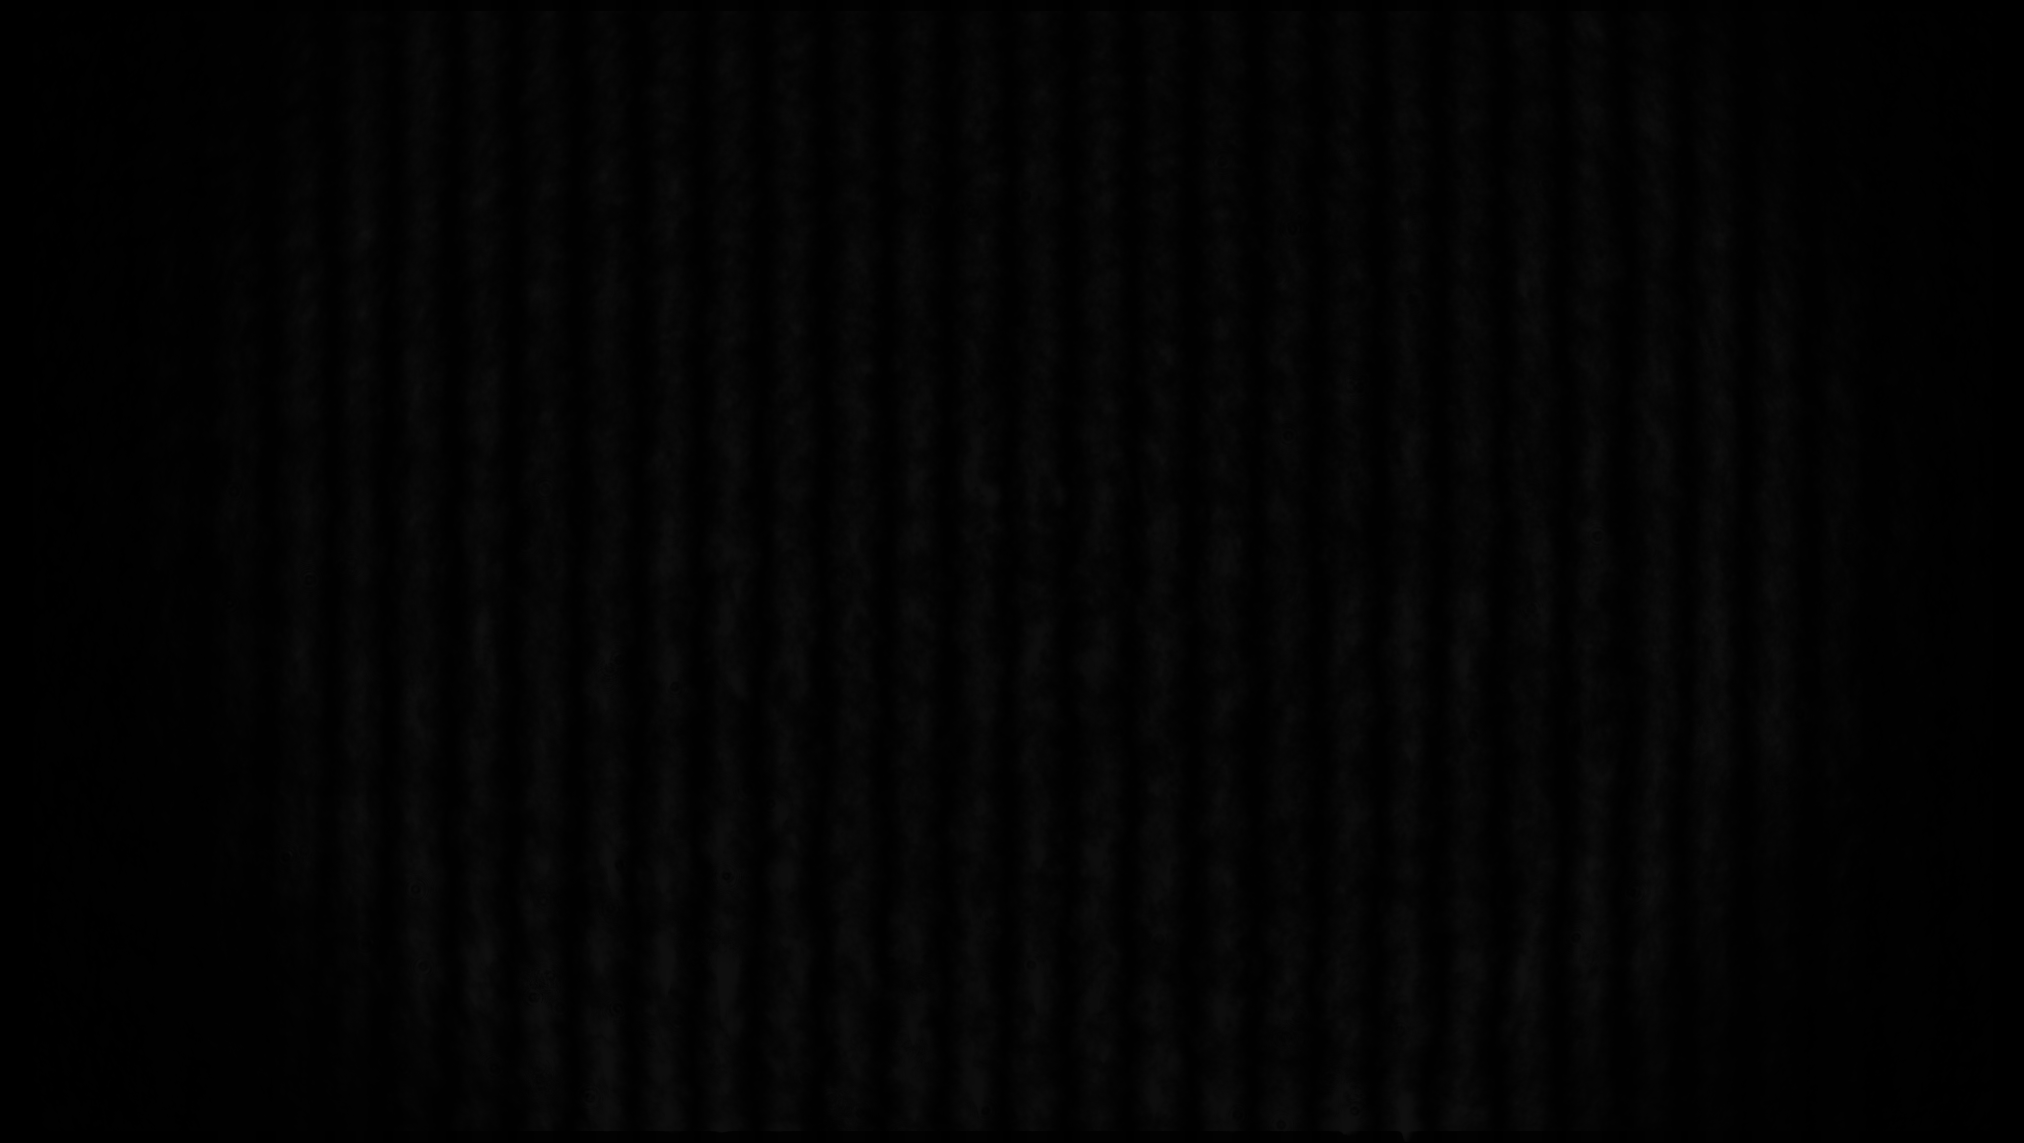

In [66]:
Image.open('xall.tiff', 'r')

In [93]:
class interference:
    def __init__(self, black, first, second, interf ):
        self.blackIm = Image.open(black)
        self.blackArray = numpy.asarray(self.blackIm)
        self.firstIm = Image.open(first)
        self.firstArray = numpy.asarray(self.firstIm)
        self.secondIm = Image.open(second)
        self.secondArray = numpy.asarray(self.secondIm)
        self.interfIm = Image.open(interf)
        self.interfArray = numpy.asarray(self.interfIm)
        self.numberOfArrays = self.firstArray.shape[0]
        self.arrayLen = self.firstArray.shape[1]
        self.normalize()
        self.firstCut = self.firstNormArray.copy()
        self.secondCut = self.secondNormArray.copy()
        self.interfCut = self.interfNormArray.copy()
        self.firstAvg = []
        self.secondAvg = []
        self.interfAvg = []
        self.cos = []
        self.arccos = []
    def normalize(self):
        self.firstNormArray = self.firstArray.copy()#numpy.zeros(self.firstArray.shape)
        self.secondNormArray = self.secondArray.copy() #numpy.zeros(self.firstArray.shape)
        self.interfNormArray = self.firstArray.copy() #numpy.zeros(self.firstArray.shape)
        for i in range(self.numberOfArrays):
            for j in range(self.arrayLen):
                if (self.blackArray[i][j] < self.firstArray[i][j]):
                    self.firstNormArray[i][j] = (self.firstArray[i][j] - self.blackArray[i][j])
                else: 
                    self.firstNormArray[i][j] = 0
                if (self.blackArray[i][j] < self.secondArray[i][j]):
                    self.secondNormArray[i][j] = (self.secondArray[i][j] - self.blackArray[i][j])
                else: 
                    self.secondNormArray[i][j] = 0
                if (self.blackArray[i][j] < self.interfArray[i][j]):
                    self.interfNormArray[i][j] = (self.interfArray[i][j] - self.blackArray[i][j])
                else: 
                    self.interfNormArray[i][j] = 0
    def cutMiddle(self, size):
        self.cutSize = size
        center = self.numberOfArrays // 2
        #center = 550
        start = center - size // 2
        self.firstCut = self.firstNormArray[start:(start + size)]
        self.secondCut = self.secondNormArray[start:(start + size)]
        self.interfCut = self.interfNormArray[start:(start + size)]
        self.firstCutOrig = self.firstArray[start:(start + size)]
        self.secondCutOrig = self.secondArray[start:(start + size)]
        self.interfCutOrig = self.interfArray[start:(start + size)]
        self.blackCutOrig = self.blackArray[start:(start + size)]
    def countAverage(self):
        for i in range(self.cutSize):
            colFirst = [self.firstCut[i][j] for j in range(self.arrayLen)]
            colSecond = [self.secondCut[i][j] for j in range(self.arrayLen)]
            colInterf = [self.interfCut[i][j] for j in range(self.arrayLen)]
        self.firstAvg =[numpy.average(colFirst[i]) for i in range(self.arrayLen)]
        self.secondAvg =[numpy.average(colSecond[i]) for i in range(self.arrayLen)]
        self.interfAvg =[numpy.average(colInterf[i]) for i in range(self.arrayLen)]
    def countCos(self):
        self.cos = []
        for i in range(self.arrayLen):
            if (self.firstAvg[i] > 0.01 and self.secondAvg[i] > 0.01):
                cosItem = (self.interfAvg[i] - self.firstAvg[i] - self.secondAvg[i])/(2*(self.firstAvg[i]*self.secondAvg[i])**(0.5))/0.75
            else:
                cosItem = 0
            if (cosItem > 1):
                cosItem = 1
            elif (cosItem < -1):
                cosItem = -1
            self.cos.append(cosItem)

    def countArccos(self):
        self.arccos = [numpy.arccos(c) for c in self.cos]

    def countPhase(self, pieces):
        self.phase = []
        signs = numpy.zeros(len(self.arccos))
        for i,j in pieces:
            for k in range(i,j):
                signs[k] = 1
        curPhase = 0
        for i in range(len(self.arccos) - 1):
            last = self.arccos[i]
            cur =  self.arccos[i + 1]
            delta = cur - last
            if signs[i] == 0:
                curPhase += delta
                self.phase.append(curPhase)
            else:
                curPhase -= delta
                self.phase.append(curPhase)
        self.phase = [ph/2/numpy.pi*632 for ph in self.phase]
        fp = sp.polyfit([i for i in range(len(self.phase))], self.phase, 1)
        f = sp.poly1d(fp)
        self.phaseAppr = [f(i) for i in range(len(self.phase))]
        self.profile = [(self.phase[j] - self.phaseAppr[j]) for j in range(len(self.phaseAppr))]
        self.aver = numpy.mean(self.profile)
        self.rms = numpy.std(self.profile)
                
    def countAll(self):
        self.cutMiddle(100)
        self.countAverage()
        self.countCos()
        self.countArccos()
        

In [94]:
int2 = interference('my_data/x0.tiff', 'my_data/x1.tiff', 'my_data/x2.tiff', 'my_data/xall.tiff')

In [95]:
int2.countAll()

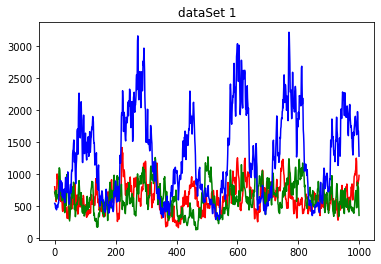

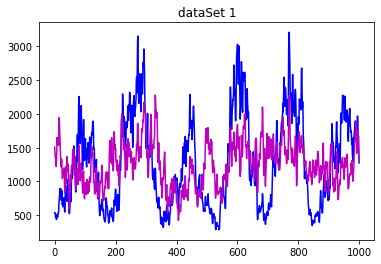

In [96]:
fig21, ax21 = plt.subplots(1)
plt.title('dataSet 1')
fig22, ax22 = plt.subplots(1)
ax21.plot(int2.firstAvg[500:1500], color='r') 
ax21.plot(int2.secondAvg[500:1500], color='g') 
#ax1.plot(int1.firstCut[70], color = 'g')
ax21.plot(int2.interfAvg[500:1500], color='b') 
ax22.plot(int2.interfAvg[500:1500], color = 'b')
ax22.plot([int2.secondAvg[i]+int2.firstAvg[i]  for i in range(500, 1500)], color='m')
#ax1.grid(True)
plt.title('dataSet 1')
plt.show()

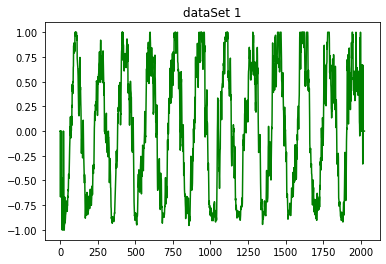

In [97]:
fig23, ax23 = plt.subplots(1)
plt.title('dataSet 1')
ax23.plot(int2.cos, color='g')

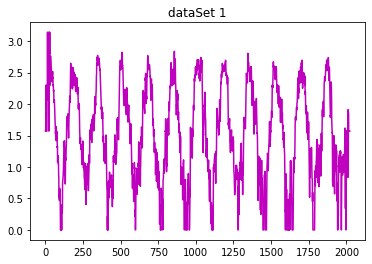

In [98]:
fig24, ax24 = plt.subplots(1)
plt.title('dataSet 1')
ax24.plot(int2.arccos, color='m')

In [42]:
pieces = [(25, 100 )]
int2.countPhase(pieces)

<ipython-input-39-7798cee98825>:122: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fp = sp.polyfit([i for i in range(len(self.phase))], self.phase, 1)


<ipython-input-93-e10e63440be4>:94: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fp = sp.polyfit([i for i in range(len(self.phase))], self.phase, 1)


<bound method Axes.plot of <AxesSubplot:title={'center':'dataSet 1'}>>

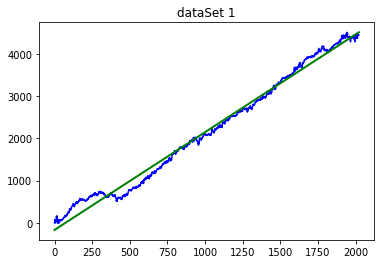

In [99]:
int2.countAll()
pieces = [(25, 100 ), (200, 275), (300, 375), (500, 600), (680, 780), (850, 950), (1000, 1100), (1200, 1275), (1350, 1450), (1520, 1620), (1700, 1800), (1870, 1950)]
#pieces = []
int2.countPhase(pieces)
fig25, ax25 = plt.subplots(1)
plt.title('dataSet 1')
ax25.plot(int2.phase, color='b')
ax25.plot(int2.phaseAppr, linewidth=2, color='g')
ax25.plot

<bound method Axes.plot of <AxesSubplot:title={'center':'dataSet 1'}>>

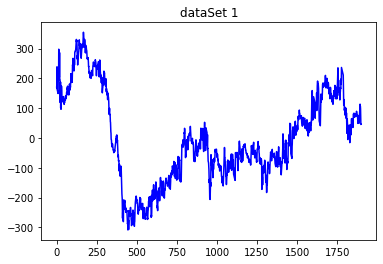

In [100]:
fig26, ax26 = plt.subplots(1)
plt.title('dataSet 1')
ax26.plot(int2.profile[:1900], color='b')
#ax25.plot(int2.phaseAppr, linewidth=2, color='g')
ax26.plot

In [101]:
max(int2.profile[:1900])- min(int2.profile[:1900])

663.0688482399131

In [102]:
int2.rms

146.90717952209633